<a href="https://colab.research.google.com/github/rebell32/CODSOFT/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [ ]:
data = pd.read_csv("advertising.csv")
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
data.shape

(200, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#check for null values and remove if necessary, in this case there are no null values in the dataset
data.isnull().sum()*100/data.shape[0]
#for in value just use data.isnull().sum()

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

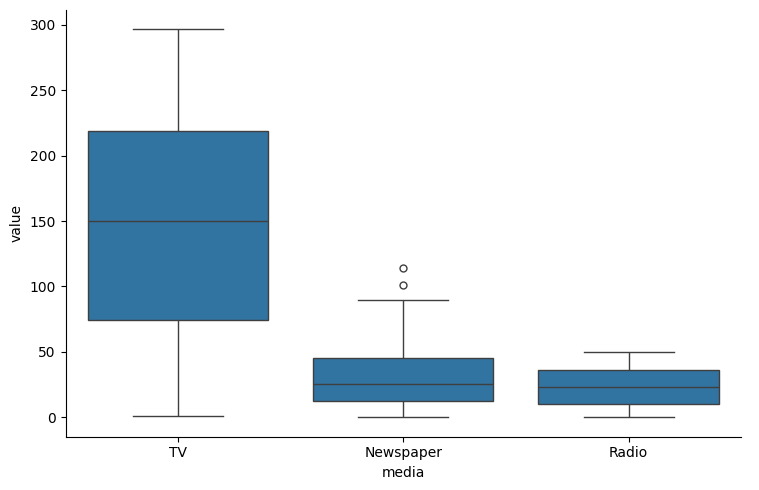

In [ ]:
#melting dataframe to have all variables in 1 column
data_melted = data.melt(value_vars=['TV','Newspaper','Radio'], var_name='media')

#plot using catplot
sns.catplot(data=data_melted,x='media',y='value',kind='box',height=5,aspect=1.5)

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

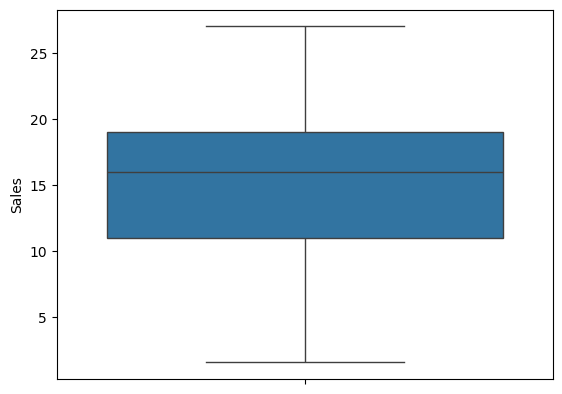

In [ ]:
sns.boxplot(data['Sales'])
plt.show

Comparing sales with TV, Newspaper, Radio
Basically Y="sales" is independant variable and X(TV,Newspaper, Radio) are dependant variables
Eqn=> Y=mX+b

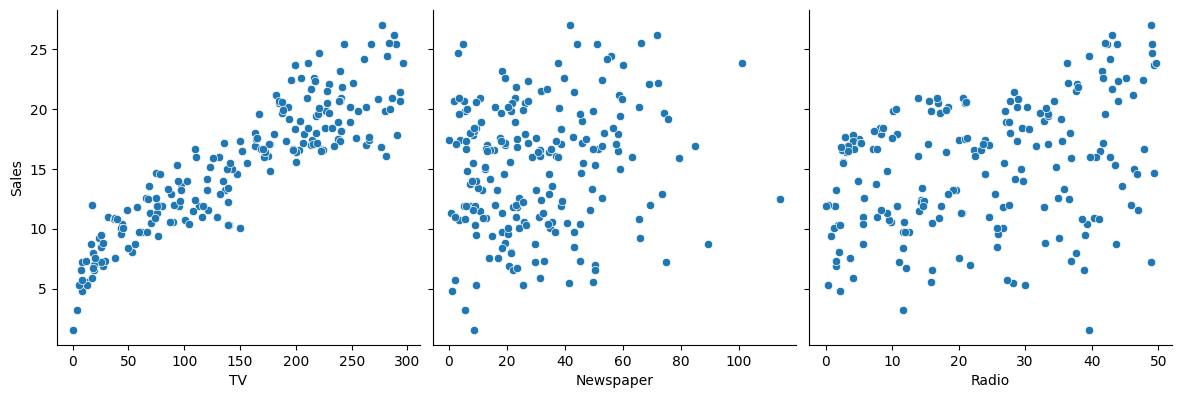

In [ ]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],y_vars='Sales', height=4, aspect=1,kind='scatter')
plt.show()

To find correlation between differen variables.

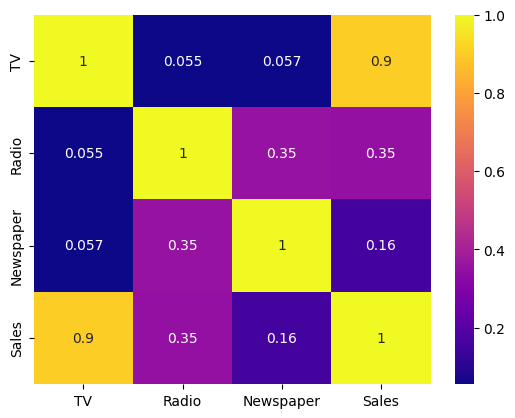

In [ ]:
sns.heatmap(data.corr(), cmap="plasma", annot=True)
plt.show()

From the graph we can see TV is the most correlated with Sales, so now we will perform simple linear regression using TV as the feature variable.

In [ ]:
X= data['TV']
Y= data['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# train dataset
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [ ]:
Y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm=sm.add_constant(X_train)

lr = sm.OLS(Y_train, X_train_sm).fit()

In [ ]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 04 May 2024   Prob (F-statistic):           1.52e-52
Time:                        16:49:09   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

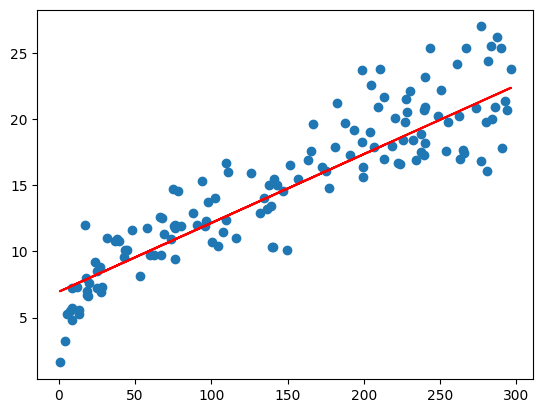

In [ ]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.948+ 0.052*X_train, 'r')
plt.show()

In [ ]:
Y_train_pred = lr.predict(X_train_sm)
res = ( Y_train - Y_train_pred)

<ipython-input-22-049563fd1bf6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


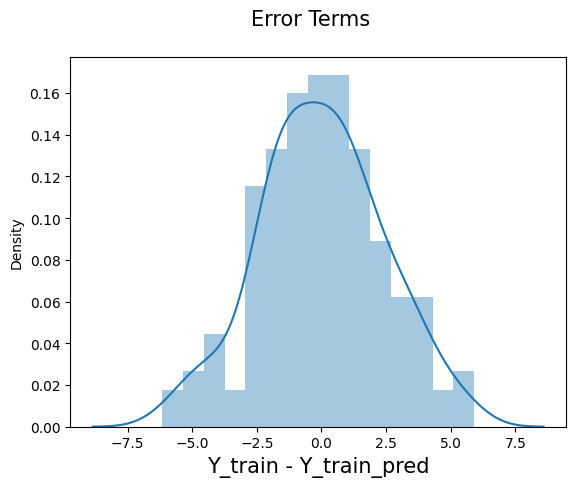

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)

fig.suptitle('Error Terms', fontsize= 15)

plt.xlabel('Y_train - Y_train_pred', fontsize = 15)

plt.show()

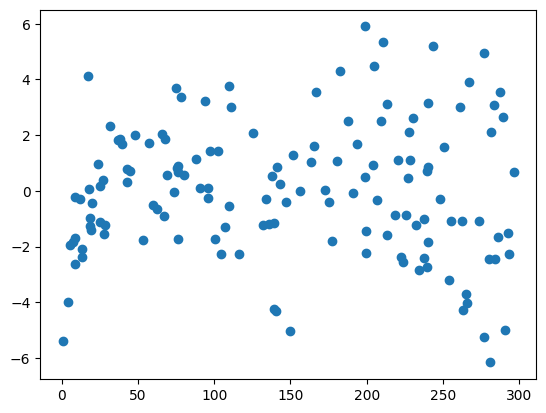

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
X_test_sm = sm.add_constant(X_test)
Y_pred = lr.predict(X_test_sm)

In [ ]:
Y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

2.019296008966232

In [ ]:
r_squared = r2_score(Y_test, Y_pred)
r_squared

0.792103160124566

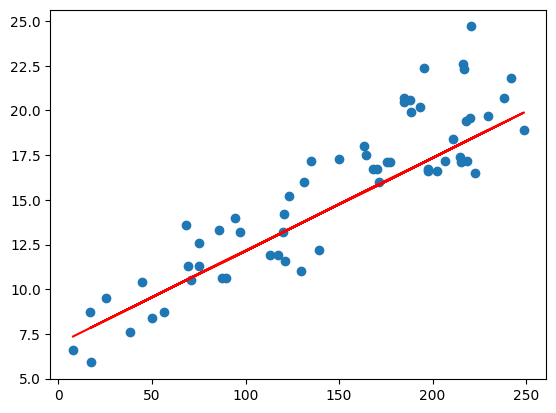

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 6.948+ 0.052*X_test, 'r')
plt.show()